In [7]:
using VoltageMap

# 2022-01-08 • 1000-to-1

## Generate spikes

In [1]:
N_exc    = 1600
N_inh    = 400
N_unconn = 100;

We want Poisson firing, i.e. ISIs with an exponential distribution.  
Firing rates lognormally distributed (instad of the same as before).

Sim receives a vector of firing rates.

In [84]:
using Plots, Distributions
using Unitful: Hz

In [67]:
default(size=(400,170), legend=false)

Mean and variance from Roxin2011 (cross checked with its refs Hromádka, O'Connor).

In [112]:
input_spike_rate_mean = 4   # mean of firing rate
input_spike_rate_σ = √(1.04);  # stddev of log(firing rate)

https://discourse.julialang.org/t/lognormal-distribution-how-to-set-mu-and-sigma/7101/

In [169]:
input_spike_rate_μ = log(input_spike_rate_mean) - input_spike_rate_σ^2 / 2;   # mean of log(firing rate)

In [166]:
firing_rate_distr = LogNormal(input_spike_rate_μ, input_spike_rate_σ)

LogNormal{Float64}(μ=0.8662943611198906, σ=1.019803902718557)

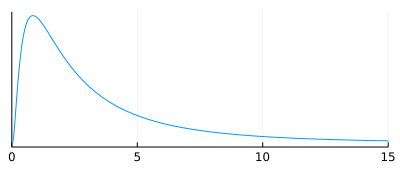

In [159]:
firing_rate = 0.01:0.01:100
plot(firing_rate, pdf.(firing_rate_distr, firing_rate), yticks=false, xlim=(0, 15))

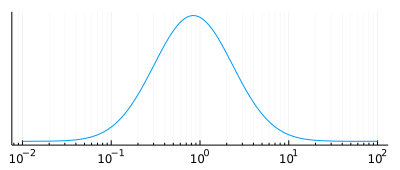

In [160]:
plot(firing_rate, pdf.(firing_rate_distr, firing_rate), yticks=false, xscale=:log10, minorgrid=true)

In [161]:
using PyPlot: subplots

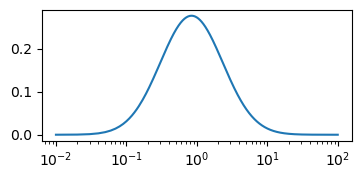

In [163]:
fig, ax = subplots(figsize=(4,1.7))
ax.semilogx(firing_rate, pdf.(firing_rate_distr, firing_rate));

In [168]:
rand(firing_rate_distr, 10) * Hz

10-element Vector{Quantity{Float64, 𝐓^-1, Unitful.FreeUnits{(Hz,), 𝐓^-1, nothing}}}:
   7.321929775654992 Hz
   7.170783924784112 Hz
   5.591421261225147 Hz
  0.7431606922308532 Hz
   1.557063955305312 Hz
  1.7679093829796335 Hz
   4.095776038153036 Hz
   1.439684008068876 Hz
  3.7364494159926376 Hz
 0.47880217067525166 Hz